In [35]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity


N=100
mu=1
sigma=0.2

chi=uniform.rvs(N)
M=norm.rvs(mu, sigma, N)
Mirr=M*np.sqrt((1+np.sqrt(chi*chi))/2)




(2.5, 12.0)

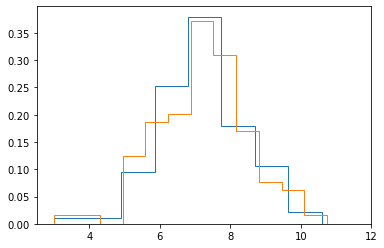

In [37]:
_ = fancyhist(Mirr, bins="scott", histtype="step",density=True)
_ = fancyhist(Mirr, bins="freedman", histtype="step",density=True)
plt.xlim(2.5,12)

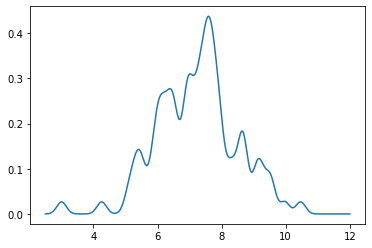

In [39]:
xgrid = np.linspace(2.5,12,1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)


PDFtophat = kde_sklearn(Mirr,bandwidth=0.15,kernel="gaussian") #Complete
plt.plot(xgrid,PDFtophat) #Complete